<h1 style="font-family: 'Courier New', Courier, monospace; color: lime; text-shadow: 2px 2px black; text-align: center;">
    Credit Card Fraud Detection
</h1>


<div style="text-align: center;">
    <img src="https://cdn.corporatefinanceinstitute.com/assets/online-payment-companies-1024x683.jpeg" alt="Online Payment Image" width="800"/>
</div>


<h3 style="font-family: 'Courier New', Courier, monospace; color: lime; text-shadow: 1px 1px black;">
    Enunciado del problema:
</h3>

<p>
    Los fraudes con tarjetas de crédito son casos en los que se utilizan las tarjetas de crédito de otra persona para realizar transacciones financieras sin la información del titular de la tarjeta. Las tarjetas de crédito se pusieron a disposición de las personas para aumentar su poder adquisitivo; se trata de un acuerdo con su banco que permite al usuario utilizar el dinero prestado por el banco a cambio de la devolución de este dinero prestado en la fecha de vencimiento o incurrir en cargos por intereses. Con el aumento del comercio electrónico y el reciente auge de las plataformas OTT durante la pandemia del coronavirus, el uso de tarjetas de crédito ha aumentado exponencialmente junto con otros procesos de pago. Como todas las cosas en la naturaleza son binarias, los casos de fraudes con tarjetas de crédito también han alcanzado cifras elevadas. La economía mundial paga el precio de más de 24 mil millones de dólares al año debido a estos fraudes. Por lo tanto, se vuelve esencial resolver este problema y, como resultado, han nacido muchas empresas emergentes en esta industria de 30 mil millones de dólares. Por lo tanto, es necesario crear modelos automatizados para un enunciado de problema tan creciente y la IA - ML es la clave para ello.
</p>

<h3 style="font-family: 'Courier New', Courier, monospace; color: lime; text-shadow: 1px 1px black;">
    Objetivo:
</h3>

<p>
    - Clasificar si una transacción con tarjeta de crédito es fraudulenta o genuina y manejar conjuntos de datos desequilibrados.<br>
    - Es un problema de <strong>clasificación binaria</strong> con datos altamente desequilibrados.
</p>



<h3 style="font-family: 'Courier New', Courier, monospace; color: lime; text-shadow: 1px 1px black;">
    Atributos del conjunto de datos:
</h3>

- **V1 - V28**: Características numéricas que son resultado de la transformación de PCA.

- **Tiempo**: Segundos transcurridos entre cada transacción y la primera transacción.

- **Monto**: Monto de la transacción.

- **Clase**: Fraude o cualquier otro motivo (1 o 0)

<h3 style="font-family: 'Courier New', Courier, monospace; color: lime; text-shadow: 1px 1px black;">
    Contenido del cuaderno:
</h3>

- Información del conjunto de datos
- Visualización de datos
- Selección de características
- Balanceo de datos
- Modelado
- Conclusión

<h3 style="font-family: 'Courier New', Courier, monospace; color: lime; text-shadow: 1px 1px black;">
    Lo que aprenderá:
</h3>

- Balanceo de datos con SMOTE.
- Pruebas estadísticas para selección de características.
- Comparación de modelos en función de las características seleccionadas en función de pruebas estadísticas.
- Modelado y visualización de resultados para algoritmos.

### ¡Comencemos!

<h1 style="font-family: 'Courier New', Courier, monospace; color: lime; text-shadow: 2px 2px black; text-align: center;">
    Información del conjunto de datos
</h1>

<h3 style="font-family: 'Courier New', Courier, monospace; color: lime; text-shadow: 1px 1px black;">
    Importar las bibliotecas necesarias:
</h3>


In [36]:
import pandas as pd
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format

In [37]:
# Ruta del archivo .zip
zip_file_path = 'dataset/creditcard.csv.zip'

# Extraer y cargar el archivo CSV directamente desde el .zip
with zipfile.ZipFile(zip_file_path, 'r') as z:
    with z.open('creditcard.csv') as csv_file:
        df = pd.read_csv(csv_file)

# Imprimir las primeras filas en formato Markdown
print(df.head().to_markdown())

|    |   Time |        V1 |         V2 |      V3 |        V4 |         V5 |         V6 |        V7 |         V8 |        V9 |        V10 |       V11 |        V12 |       V13 |       V14 |       V15 |       V16 |       V17 |        V18 |       V19 |        V20 |        V21 |        V22 |       V23 |        V24 |       V25 |       V26 |        V27 |        V28 |   Amount |   Class |
|---:|-------:|----------:|-----------:|--------:|----------:|-----------:|-----------:|----------:|-----------:|----------:|-----------:|----------:|-----------:|----------:|----------:|----------:|----------:|----------:|-----------:|----------:|-----------:|-----------:|-----------:|----------:|-----------:|----------:|----------:|-----------:|-----------:|---------:|--------:|
|  0 |      0 | -1.35981  | -0.0727812 | 2.53635 |  1.37816  | -0.338321  |  0.462388  |  0.239599 |  0.0986979 |  0.363787 |  0.0907942 | -0.5516   | -0.617801  | -0.99139  | -0.311169 |  1.46818  | -0.470401 |  0.207971 |  0.02579

<h3 style="font-family: 'Courier New', Courier, monospace; color: lime; text-shadow: 1px 1px black;">
    Información de los Datos:
</h3>


In [38]:
df.shape

(284807, 31)

In [39]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

<Axes: >

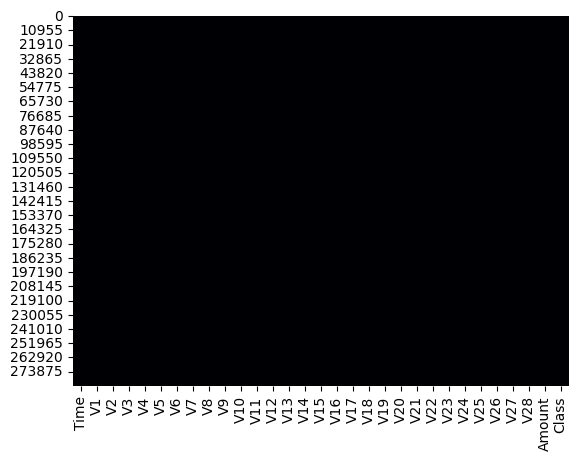

In [41]:
sns.heatmap(df.isnull(),cmap = 'magma',cbar = False)

    - En este gráfico podemos apreciar la ausencia de valores nulos. Para mayor seguridad haremos otro gráfico inverso:

C:\Users\londe\AppData\Local\Temp\ipykernel_22224\2406080171.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_values.index, y=missing_values.values, palette='magma')


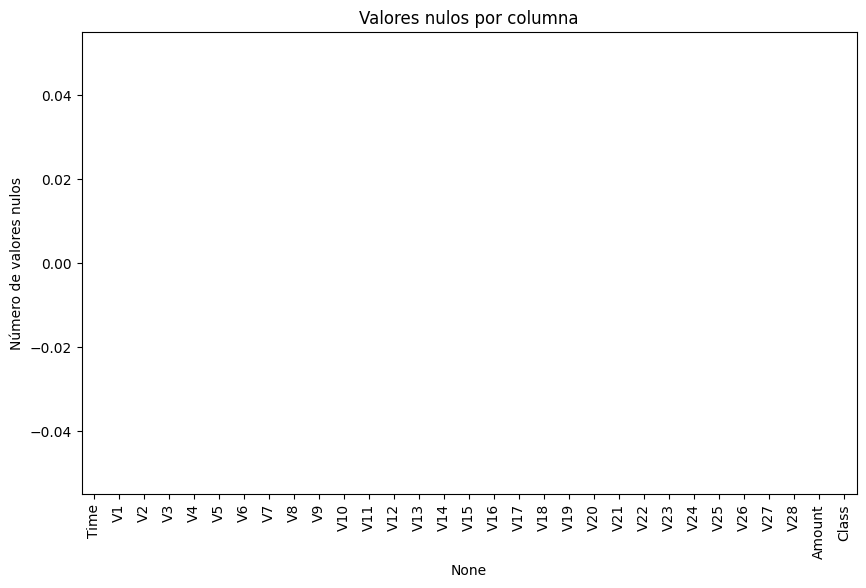

In [42]:
# Contar los valores nulos por columna
missing_values = df.isnull().sum()

# Crear un gráfico de barras
plt.figure(figsize=(10,6))
sns.barplot(x=missing_values.index, y=missing_values.values, palette='magma')

# Etiquetas del gráfico
plt.xticks(rotation=90)  # Rotar las etiquetas del eje X si son muchas columnas
plt.ylabel('Número de valores nulos')
plt.title('Valores nulos por columna')
plt.show()


    - Como podemos apreciar, no existen valores nulos en este conjunto de datos.

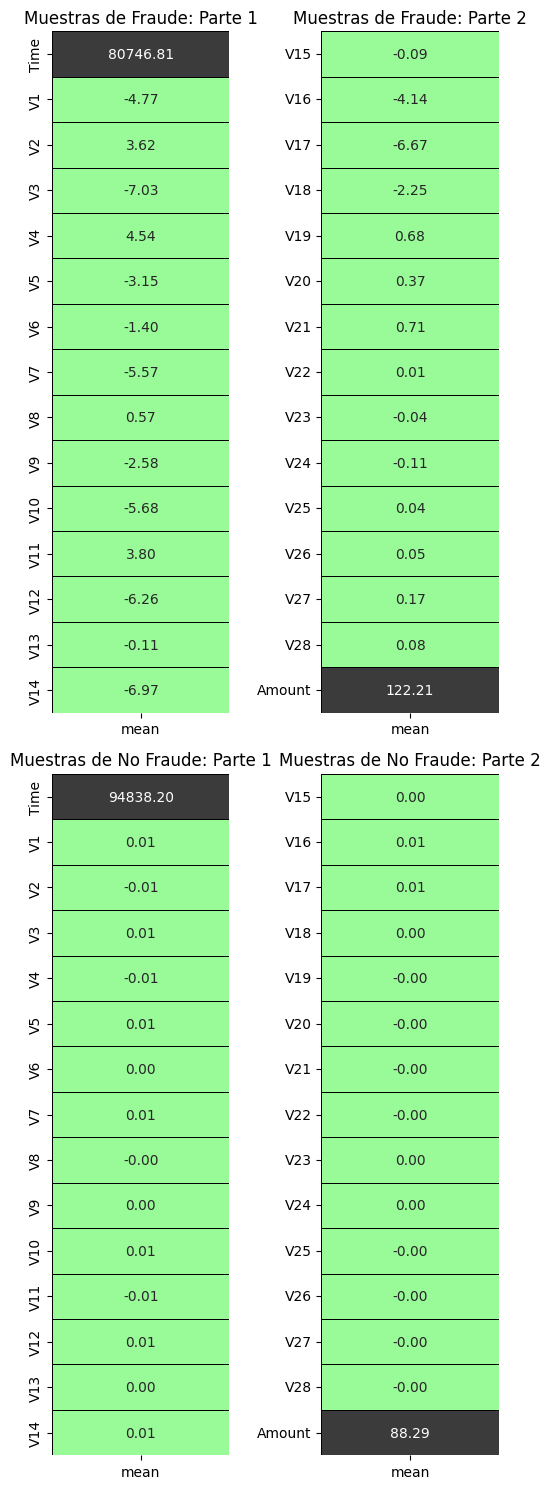

In [43]:
fraud = df[df['Class'] == 1].describe().T
nofraud = df[df['Class'] == 0].describe().T

# Cambiar la paleta de colores a tonos de verde
colors = ['#98FB98', '#3B3B3C']  # Verde claro y gris oscuro

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(5, 15))

# Parte 1 - Fraude
plt.subplot(2, 2, 1)
sns.heatmap(fraud[['mean']][:15], annot=True, cmap=colors, linewidths=0.5, linecolor='black', cbar=False, fmt='.2f')
plt.title('Muestras de Fraude: Parte 1')

# Parte 2 - Fraude
plt.subplot(2, 2, 2)
sns.heatmap(fraud[['mean']][15:30], annot=True, cmap=colors, linewidths=0.5, linecolor='black', cbar=False, fmt='.2f')
plt.title('Muestras de Fraude: Parte 2')

# Parte 1 - No Fraude
plt.subplot(2, 2, 3)
sns.heatmap(nofraud[['mean']][:15], annot=True, cmap=colors, linewidths=0.5, linecolor='black', cbar=False, fmt='.2f')
plt.title('Muestras de No Fraude: Parte 1')

# Parte 2 - No Fraude
plt.subplot(2, 2, 4)
sns.heatmap(nofraud[['mean']][15:30], annot=True, cmap=colors, linewidths=0.5, linecolor='black', cbar=False, fmt='.2f')
plt.title('Muestras de No Fraude: Parte 2')

# Ajustar el espacio entre los subgráficos
fig.tight_layout(w_pad=2)


- Valores **promedio** de las características para los casos **Fraude** y **No Fraude**.
- Para los casos **No Fraude**, los valores promedio de **V1 a V28** son casi **0** para todos los casos. El **Monto** promedio, 88,29, es menor que el monto promedio de la transacción, 122,21, de los casos **Fraude**.
- El **Tiempo** que toma para las transacciones **No Fraude** es mayor que el de las transacciones **Fraude**.
- Estos podrían ser algunos de los indicadores para detectar transacciones **fraudulentas**.

<h1 style="font-family: 'Courier New', Courier, monospace; color: lime; text-shadow: 2px 2px black; text-align: center;">
    Visualización de Datos
</h1>

<h3 style="font-family: 'Courier New', Courier, monospace; color: lime; text-shadow: 1px 1px black;">
    Visualización de la variable de destino (clase):
</h3>


C:\Users\londe\AppData\Local\Temp\ipykernel_22224\2390023062.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Class', data=df, edgecolor='black', palette=colors)
C:\Users\londe\AppData\Local\Temp\ipykernel_22224\2390023062.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['No Fraud', 'Fraud'])


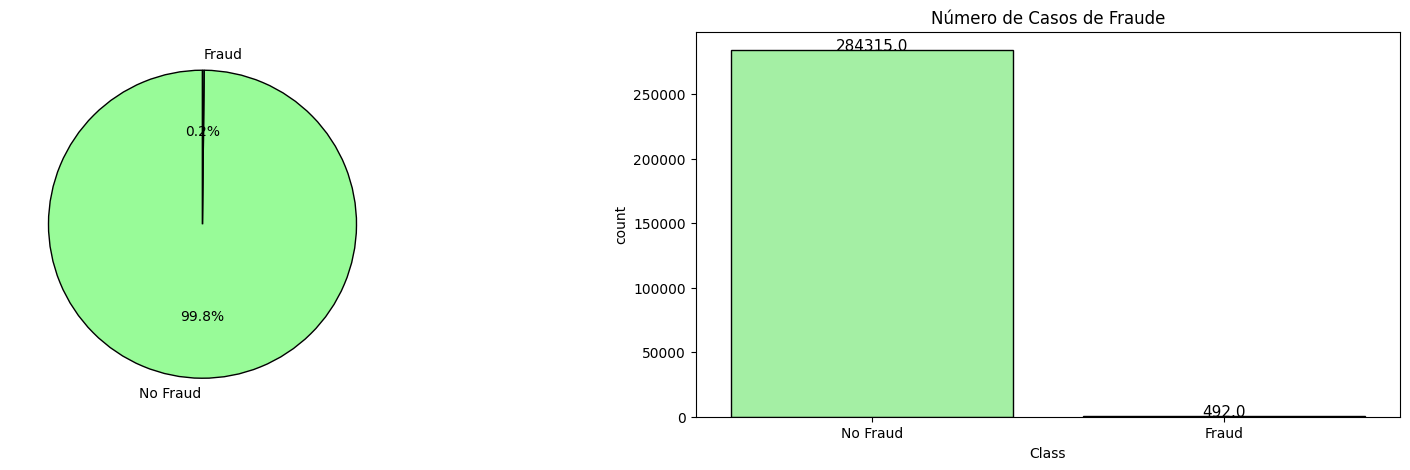

In [44]:
fraud = len(df[df['Class'] == 1]) / len(df) * 100
nofraud = len(df[df['Class'] == 0]) / len(df) * 100
fraud_percentage = [nofraud, fraud]

# Cambiar la paleta de colores a tonos de verde
colors = ['#98FB98', '#3CB371']  # Verde claro y verde medio

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

# Gráfico circular (pie chart)
plt.subplot(1, 2, 1)
plt.pie(fraud_percentage, labels=['No Fraud', 'Fraud'], autopct='%1.1f%%', startangle=90, colors=colors,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})

# Gráfico de conteo (countplot)
plt.subplot(1, 2, 2)
ax = sns.countplot(x='Class', data=df, edgecolor='black', palette=colors)
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(),
            horizontalalignment='center', fontsize=11)
ax.set_xticklabels(['No Fraud', 'Fraud'])
plt.title('Número de Casos de Fraude')

plt.show()


- Los datos están claramente **muy desequilibrados** y la mayoría de las transacciones son **sin fraude**.
- Debido a que los datos están muy desequilibrados, el modelo de clasificación sesgará su predicción hacia la clase mayoritaria, **sin fraude**.
- Por lo tanto, el equilibrio de los datos se convierte en una parte crucial para construir un modelo sólido.

<h1 style="font-family: 'Courier New', Courier, monospace; color: lime; text-shadow: 2px 2px black; text-align: center;">
    Selección de funciones
</h1>

<h3 style="font-family: 'Courier New', Courier, monospace; color: lime; text-shadow: 1px 1px black;">
    Matriz de correlación:
</h3>


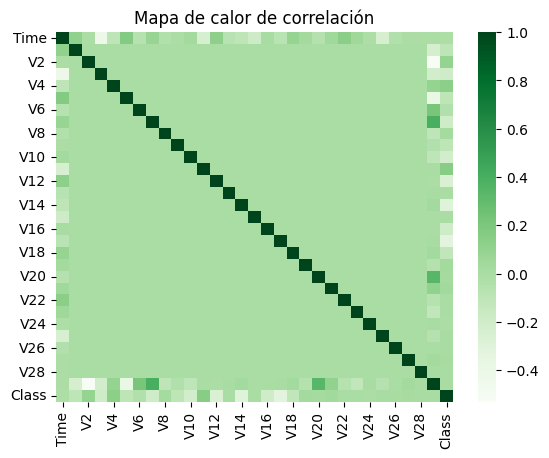

In [45]:
# Definir una paleta de colores verde
colors = sns.color_palette("Greens", as_cmap=True)

# Crear el heatmap con el nuevo cmap en tonos verdes
sns.heatmap(df.corr(), cmap=colors, cbar=True)

plt.title('Mapa de calor de correlación')
plt.show()


- Hay demasiadas características en el conjunto de datos y es difícil comprender algo.
- Por lo tanto, trazaremos el mapa de correlación solo con la variable de destino.

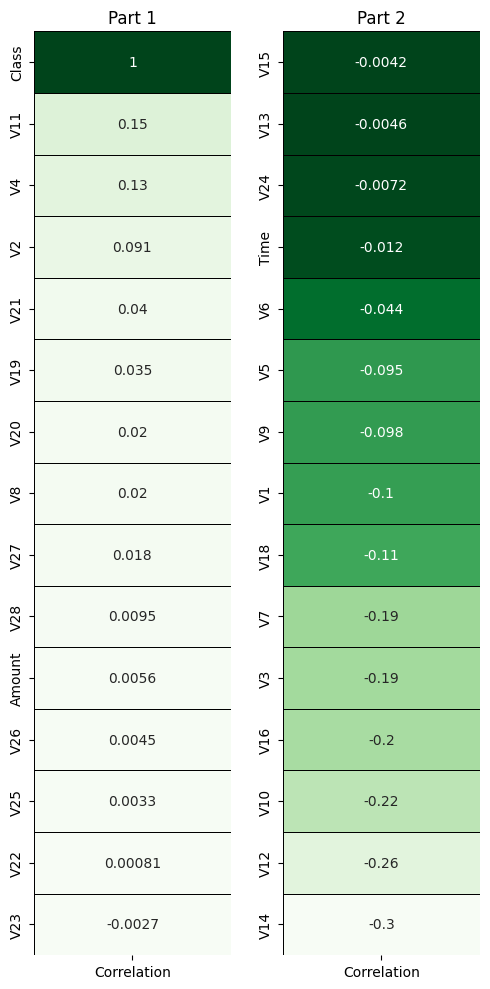

In [46]:
corr = df.corrwith(df['Class']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlation']
fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,10))

plt.subplot(1,2,1)
sns.heatmap(corr.iloc[:15,:],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False)
plt.title('Part 1')

plt.subplot(1,2,2)
sns.heatmap(corr.iloc[15:30],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False)
plt.title('Part 2')

fig.tight_layout(w_pad = 2)

- Para la selección de características, **excluiremos** las características que tengan valores de correlación entre **[-0,1, 0,1]**.
- V4 y V11 están correlacionadas positivamente y V7, V3, V16, V10, V12, V14 y V17 están correlacionadas negativamente con la característica **Clase**.

<h3 style="font-family: 'Courier New', Courier, monospace; color: lime; text-shadow: 1px 1px black;">
    Test ANOVA:
</h3>


In [47]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

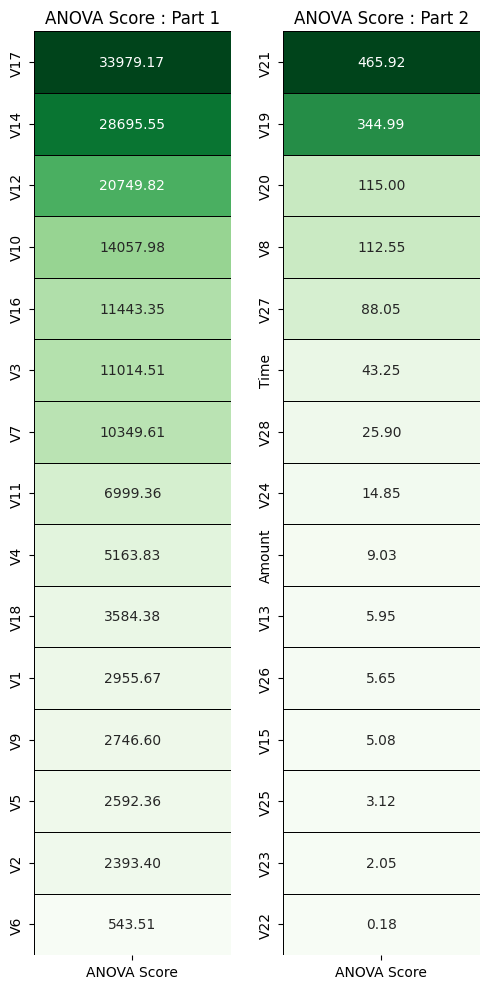

In [48]:
features = df.loc[:,:'Amount']
target = df.loc[:,'Class']

best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['ANOVA Score']) 
featureScores = featureScores.sort_values(ascending = False,by = 'ANOVA Score')

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,10))

plt.subplot(1,2,1)
sns.heatmap(featureScores.iloc[:15,:],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False, fmt = '.2f')
plt.title('ANOVA Score : Part 1')

plt.subplot(1,2,2)
sns.heatmap(featureScores.iloc[15:30],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False, fmt = '.2f')
plt.title('ANOVA Score : Part 2')

fig.tight_layout(w_pad = 2)

- Cuanto mayor sea el valor de la puntuación ANOVA, mayor será la importancia de esa característica con respecto a la variable de destino.
- Del gráfico anterior, rechazaremos las características con valores inferiores a 50.
- En este caso, crearemos 2 modelos basados ​​en las características seleccionadas del **Gráfico de correlación** y la **puntuación ANOVA**.

<h3 style="font-family: 'Courier New', Courier, monospace; color: lime; text-shadow: 1px 1px black;">
    Conjunto de datos para el modelo basado en el gráfico de correlación:
</h3>


In [49]:
df1 = df[['V3','V4','V7','V10','V11','V12','V14','V16','V17','Class']].copy(deep = True)
df1.head()

,V3,V4,V7,V10,V11,V12,V14,V16,V17,Class
0,2.54,1.38,0.24,0.09,-0.55,-0.62,-0.31,-0.47,0.21,0
1,0.17,0.45,-0.08,-0.17,1.61,1.07,-0.14,0.46,-0.11,0
2,1.77,0.38,0.79,0.21,0.62,0.07,-0.17,-2.89,1.11,0
3,1.79,-0.86,0.24,-0.05,-0.23,0.18,-0.29,-1.06,-0.68,0
4,1.55,0.40,0.59,0.75,-0.82,0.54,-1.12,-0.45,-0.24,0


<h3 style="font-family: 'Courier New', Courier, monospace; color: lime; text-shadow: 1px 1px black;">
    Conjunto de datos para el modelo basado en la puntuación ANOVA:
</h3>


In [50]:
df2 = df.copy(deep = True)
df2.drop(columns = list(featureScores.index[20:]),inplace = True)
df2.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V12,V14,V16,V17,V18,V19,V20,V21,V27,Class
0,-1.36,-0.07,2.54,1.38,-0.34,0.46,0.24,0.10,0.36,0.09,...,-0.62,-0.31,-0.47,0.21,0.03,0.40,0.25,-0.02,0.13,0
1,1.19,0.27,0.17,0.45,0.06,-0.08,-0.08,0.09,-0.26,-0.17,...,1.07,-0.14,0.46,-0.11,-0.18,-0.15,-0.07,-0.23,-0.01,0
2,-1.36,-1.34,1.77,0.38,-0.50,1.80,0.79,0.25,-1.51,0.21,...,0.07,-0.17,-2.89,1.11,-0.12,-2.26,0.52,0.25,-0.06,0
3,-0.97,-0.19,1.79,-0.86,-0.01,1.25,0.24,0.38,-1.39,-0.05,...,0.18,-0.29,-1.06,-0.68,1.97,-1.23,-0.21,-0.11,0.06,0
4,-1.16,0.88,1.55,0.40,-0.41,0.10,0.59,-0.27,0.82,0.75,...,0.54,-1.12,-0.45,-0.24,-0.04,0.80,0.41,-0.01,0.22,0


<h1 style="font-family: 'Courier New', Courier, monospace; color: lime; text-shadow: 2px 2px black; text-align: center;">
    Balance de datos
</h1>

- Para hacer frente a datos desequilibrados, existen dos opciones:

    -   **Submuestreo**: reducir las muestras mayoritarias de la variable de destino.
    -   **Sobremuestreo**: aumentar las muestras minoritarias de la variable de destino hasta las muestras mayoritarias.

- Para obtener los mejores resultados, utilizaremos la combinación de submuestreo y sobremuestreo.
- Primero, realizaremos un submuestreo de las muestras mayoritarias y, a continuación, un sobremuestreo de las muestras minoritarias.
- Para equilibrar los datos, utilizaremos **imblearn**.
- **Declaración PIP**: pip install balanced-learn

In [51]:
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

<h3 style="font-family: 'Courier New', Courier, monospace; color: lime; text-shadow: 1px 1px black;">
    Balance de datos para el modelo basado en el gráfico de correlación:
</h3>


In [52]:
over = SMOTE(sampling_strategy = 0.5)
under = RandomUnderSampler(sampling_strategy = 0.1)
f1 = df1.iloc[:,:9].values
t1 = df1.iloc[:,9].values

steps = [('under', under),('over', over)]
pipeline = Pipeline(steps=steps)
f1, t1 = pipeline.fit_resample(f1, t1)
Counter(t1)

Counter({np.int64(0): 4920, np.int64(1): 2460})

<h3 style="font-family: 'Courier New', Courier, monospace; color: lime; text-shadow: 1px 1px black;">
    Balance de datos para el modelo basado en la puntuación ANOVA:
</h3>


In [53]:
over = SMOTE(sampling_strategy = 0.5)
under = RandomUnderSampler(sampling_strategy = 0.1)
f2 = df2.iloc[:,:20].values
t2 = df2.iloc[:,20].values

steps = [('under', under),('over', over)]
pipeline = Pipeline(steps=steps)
f2, t2 = pipeline.fit_resample(f2, t2)
Counter(t2)

Counter({np.int64(0): 4920, np.int64(1): 2460})

<h3 style="font-family: 'Courier New', Courier, monospace; color: lime; text-shadow: 1px 1px black;">
    Cálculo para el balanceo de datos:
</h3>


- **Estrategia de muestreo**: es una proporción que es el parámetro común para el sobremuestreo y el submuestreo.
- **Estrategia de muestreo**: **(muestras de la clase minoritaria) / (muestras de la clase mayoritaria)**

- En este caso,

    - **Clase mayoritaria: sin casos de fraude**: 284315 muestras
    - **Clase minoritaria: casos de fraude**: 492 muestras

<h3 style="font-family: 'Courier New', Courier, monospace; color: lime; text-shadow: 1px 1px black;">
    Submuestreo: Reducir las muestras de la clase mayoritaria
</h3>


- Sampling_Strategy = 0,1
- 0,1 = ( 492 ) / Muestras de la clase mayoritaria
- Después del submuestreo,

    - **Clase mayoritaria: sin casos de fraude**: 4920 muestras
    - **Clase minoritaria: casos de fraude**: 492 muestras

<h3 style="font-family: 'Courier New', Courier, monospace; color: lime; text-shadow: 1px 1px black;">
    Sobremuestreo: aumentar las muestras de clases minoritarias
</h3>


- Sampling_Strategy = 0.5
- 0.5 = (Muestras de la clase minoritaria) / 4920
- Después del sobremuestreo,

    - **Clase mayoritaria: sin casos de fraude**: 4920 muestras
    - **Clase minoritaria: casos de fraude**: 2460 muestras

- Muestras de la clase final:

    - **Clase mayoritaria: sin casos de fraude**: 4920 muestras
    - **Clase minoritaria: casos de fraude**: 2460 muestras

- Para los conjuntos de datos desequilibrados, **duplicamos los datos** para abordar el sesgo potencial en las predicciones.
- Debido a este proceso de duplicación, utilizamos **datos sintéticos** para fines de modelado para garantizar que las predicciones no estén sesgadas hacia el valor de la clase objetivo mayoritaria.
- Por lo tanto, evaluar los modelos utilizando la **precisión** será engañoso. En su lugar, utilizaremos **matriz de confusión, gráfico ROC-AUC y puntuación ROC-AUC** para la evaluación del modelo.